The Boston Housing dataset is a classic dataset used for regression analysis, containing 506 samples with 13 features related to housing prices in Boston. It includes attributes like crime rate, number of rooms, accessibility to highways, and tax rates, with the goal of predicting median home values. Though widely used in machine learning, it has been deprecated in Scikit-learn due to ethical concerns, and alternatives like the California Housing dataset are recommended.


Linear Regression

Polynomial Regression

Locally Weighted Regression (LWR)

PCA (Optional: dimensionality reduction or visualization)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score


 Load Dataset from CSV

In [3]:
# Load CSV file
file_path = r"C:\Users\bened\Documents\KLEIT\KLEIT CODE\AIML_LAB\boston_housing\HousingData.csv"
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


 Preprocessing

In [4]:
# Fill missing values with column mean
df = df.fillna(df.mean(numeric_only=True))

In [5]:
# Separate features and target
X = df.drop(columns=['MEDV'])
y = df['MEDV']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

PCA

In [6]:
print(X_train.shape)
print(X_train_scaled.shape)

(404, 13)
(404, 13)


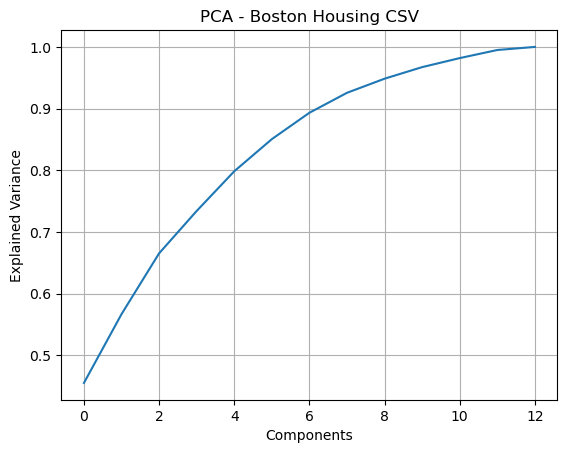

In [7]:
pca = PCA(n_components=13)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Components")
plt.ylabel("Explained Variance")
plt.title("PCA - Boston Housing CSV")
plt.grid()
plt.show()


Linear Regression

In [8]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))


Linear Regression R²: 0.6588520195508119
MSE: 25.017672023842856


Polynomial Regression

In [9]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)
y_pred_poly = poly_lr.predict(X_test_poly)

print("Polynomial Regression R²:", r2_score(y_test, y_pred_poly))
print("MSE:", mean_squared_error(y_test, y_pred_poly))


Polynomial Regression R²: 0.7622378773810766
MSE: 17.435995943874246


Locally Weighted Regression (LWR)

In [10]:
def lwr(x0, X, y, tau):
    m = X.shape[0]
    weights = np.exp(-np.sum((X - x0)**2, axis=1) / (2 * tau**2))
    W = np.diag(weights)
    theta = np.linalg.pinv(X.T @ W @ X) @ (X.T @ W @ y)
    return x0 @ theta

# Add bias term
X_train_lwr = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_lwr = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

y_pred_lwr = np.array([lwr(x0, X_train_lwr, y_train.values, tau=0.5) for x0 in X_test_lwr])

print("LWR R²:", r2_score(y_test, y_pred_lwr))
print("MSE:", mean_squared_error(y_test, y_pred_lwr))


LWR R²: 0.35426594078414686
MSE: 47.35412147777051
